## **Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#checking the device property...
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17358724345238146853
]


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

## **Load data**

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Agrotrace/dataset/dataset.csv')
print(dataset.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Registration No  921 non-null    int64  
 1   Type             921 non-null    int64  
 2   Area             921 non-null    object 
 3   Land             921 non-null    float64
 4   Total_Weight     770 non-null    object 
 5   Total_Price      770 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 43.3+ KB
None


## **Analysis**

In [ ]:
print(dataset)

     Registration No  Type        Area  Land Total_Weight  Total_Price
0        21050104006     1  Chattogram  0.00     266 (-2)      27685.0
1        21050104005     1  Chattogram  1.00     473 (-0)      59301.0
2        21030104020     1     Kushtia  0.00     201 (-0)      27740.0
3        21050104004     1  Chattogram  1.00     836 (-0)     120594.0
4        21050104003     1  Chattogram  1.00     705 (-0)      93627.0
..               ...   ...         ...   ...          ...          ...
916      21010301004     2     Rangpur  0.00          NaN          NaN
917      21010301003     2     Rangpur  1.35          NaN          NaN
918      21010301002     2     Rangpur  0.54          NaN          NaN
919      21010301001     2     Rangpur  2.00          NaN          NaN
920      21010301026     2     Rangpur  3.50          NaN          NaN

[921 rows x 6 columns]


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Registration No  921 non-null    int64  
 1   Type             921 non-null    int64  
 2   Area             921 non-null    object 
 3   Land             921 non-null    float64
 4   Total_Weight     770 non-null    object 
 5   Total_Price      770 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 43.3+ KB


In [ ]:
dataset.head()

,Registration No,Type,Area,Land,Total_Weight,Total_Price
0,21050104006,1,Chattogram,0.0,266 (-2),27685.0
1,21050104005,1,Chattogram,1.0,473 (-0),59301.0
2,21030104020,1,Kushtia,0.0,201 (-0),27740.0
3,21050104004,1,Chattogram,1.0,836 (-0),120594.0
4,21050104003,1,Chattogram,1.0,705 (-0),93627.0


In [ ]:
print(dataset.shape)

(921, 6)


In [ ]:
print(dataset.columns)

Index(['Registration No', 'Type', 'Area', 'Land', 'Total_Weight',
       'Total_Price'],
      dtype='object')


In [ ]:
dataset["Land"] = dataset["Land"].astype("int64")

## **Statistical Analysis**

In [ ]:
dataset.describe()

,Registration No,Type,Land,Total_Price
count,9.210000e+02,921.000000,921.000000,7.700000e+02
mean,2.102072e+10,1.983713,1.482085,1.255593e+05
std,1.047714e+07,0.126644,8.118414,2.944829e+05
min,2.101010e+10,1.000000,0.000000,9.088000e+03
25%,2.101020e+10,2.000000,0.000000,4.136100e+04
50%,2.102010e+10,2.000000,1.000000,5.842200e+04
75%,2.103020e+10,2.000000,2.000000,9.715300e+04
max,2.105010e+10,2.000000,200.000000,4.626462e+06


In [ ]:
dataset.max()

Registration No    21050104006
Type                         2
Area                   Rangpur
Land                       200
Total_Price        4.62646e+06
dtype: object

In [ ]:
dataset.columns.tolist()

['Registration No', 'Type', 'Area', 'Land', 'Total_Weight', 'Total_Price']

In [ ]:
for index, row in dataset.iterrows():
    print(row)
    if index == 1:
        break

Registration No    21050104006
Type                         1
Area                Chattogram
Land                         0
Total_Weight          266 (-2)
Total_Price              27685
Name: 0, dtype: object
Registration No    21050104005
Type                         1
Area                Chattogram
Land                         1
Total_Weight          473 (-0)
Total_Price              59301
Name: 1, dtype: object


## **Visualization**

**Bar plot of missing values of the data attributes** 

Registration No      0
Type                 0
Area                 0
Land                 0
Total_Weight       151
Total_Price        151
dtype: int64


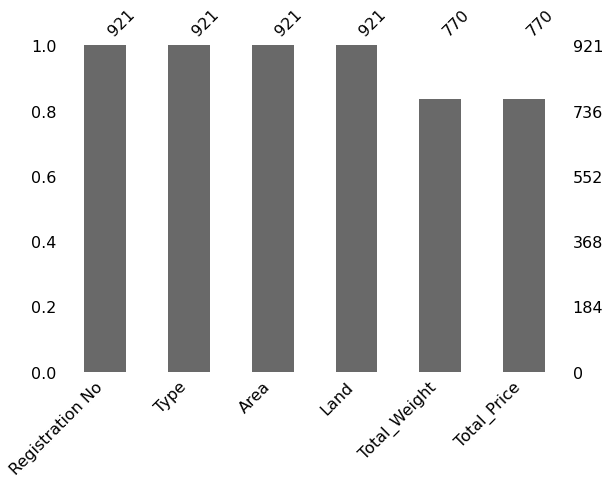

In [ ]:
import missingno as msno
print(dataset.isnull().sum())

p = msno.bar(dataset, figsize = (9,6))

**some statistical analysis**

In [ ]:
col = dataset.columns.tolist()
dataset[col].describe(percentiles = [.25,.5,.75,.95,.97,.99]) 

,Registration No,Type,Land,Total_Price
count,9.210000e+02,921.000000,921.000000,7.700000e+02
mean,2.102072e+10,1.983713,1.482085,1.255593e+05
std,1.047714e+07,0.126644,8.118414,2.944829e+05
min,2.101010e+10,1.000000,0.000000,9.088000e+03
25%,2.101020e+10,2.000000,0.000000,4.136100e+04
50%,2.102010e+10,2.000000,1.000000,5.842200e+04
75%,2.103020e+10,2.000000,2.000000,9.715300e+04
95%,2.104010e+10,2.000000,3.000000,4.047932e+05
97%,2.104011e+10,2.000000,4.000000,5.971041e+05
99%,2.104011e+10,2.000000,5.000000,1.521536e+06


**scatter plot of land vs total price values**

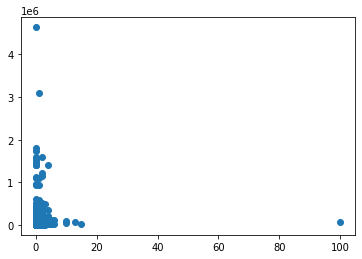

In [ ]:
x = dataset.Land
y = dataset.Total_Price
plt.scatter(x, y)
plt.show()

**plot for analysis of land vs total price values for extracting the condition of the correlation**

In [ ]:
x = dataset.Land
y = dataset.Total_Price

stats = linregress(x, y)

m = stats.slope
b = stats.intercept

# Change the default figure size
plt.figure(figsize=(10,10))

# Change the default marker for the scatter from circles to x's
plt.scatter(x, y, marker='x')

# Set the linewidth on the regression line to 3px
plt.plot(x, m * x + b, color="red", linewidth=3)

# Add x and y lables, and set their font size
plt.xlabel("Land", fontsize=20)
plt.ylabel("Total_Price", fontsize=20)

# Set the font size of the number lables on the axes
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

NameError: ignored

**histogram plot of the dataset**

In [ ]:
dataset[col].hist(figsize=(10,15),color = 'green')

**land histogram plot**

In [ ]:
sns.distplot(dataset['Land'], kde = True, hist = True, bins= 30)
plt.title("Density plot of Estimated land count")

**histogram plot of the type whether it's farmer(2) and suppliers(1)**

In [ ]:
sns.distplot(dataset['Type'], kde = True, hist = True, bins= 30)
plt.title("Density plot of Estimated type count")

**another significant bar plot on land and type**

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(dataset['Land'], palette = 'hsv')
plt.title('Count of Land')
plt.show() 
sns.countplot(dataset['Type'], palette = 'hsv')
plt.title('Count of Type ')
plt.show()

**another significant bar plot on land and total price**

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(dataset['Land'], palette = 'hsv')
plt.title('Count of Land')
plt.show() 
sns.countplot(dataset['Total_Price'], palette = 'hsv')
plt.title('Count of Total_Price')
plt.show()

In [ ]:
sns.countplot(dataset['Land'], palette = 'dark')
plt.title("Count plot of Land")
plt.show()


**visualization of area data as their frequency in the dataset**

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(dataset['Area'], palette = 'hsv')
plt.title('Count plot of Area')


**pie plot of area perncentile as the frequency**

In [ ]:
plt.pie(dataset.Land.value_counts().to_list()[:5], labels=dataset.Land.value_counts().index[:5], radius=1.8, autopct="%0.2f%%")
plt.show()

**box blot of land**

In [ ]:
plt.figure(figsize=(10,5))
plt.boxplot(np.log(dataset.Land.values))
plt.xlabel("Box Plot",fontsize=15)
plt.ylabel("log(Land)",fontsize=15)
plt.title("Box Plot of log(Land)",fontsize=20)
plt.grid()

**some correlation between different attributes of the dataset** 

In [ ]:
plt.figure(figsize=(15,6))
sns.lmplot('Land','Registration No',data=dataset,line_kws={'color':'red'})
plt.title('Registration No vs Land')
plt.grid()

In [ ]:
plt.figure(figsize=(15,6))
sns.lmplot('Total_Price','Registration No',data=dataset,line_kws={'color':'red'})
plt.title('Registration No vs Total_Price')
plt.grid()

In [ ]:
plt.figure(figsize=(15,6))
sns.lmplot('Type','Registration No',data=dataset,line_kws={'color':'green'})
plt.title('Registration No vs Type')
plt.grid()

In [ ]:
plt.figure(figsize=(15,6))
sns.lmplot('Type','Land',data=dataset,line_kws={'color':'blue'})
plt.title('Type vs Land')
plt.grid()

**land and area data analysis**

In [ ]:
sns.countplot(x="Land", hue="Area", data=dataset);

In [ ]:
sns.lineplot(x="Land", y="Registration No", data=dataset)

**pair grid plot for obtaining the characteristics amongst the parameters of the dataset**

In [ ]:
plot = sns.PairGrid(dataset)
plot.map(plt.plot)
  
plt.show()

**some box plot analysis on the dataset**

In [ ]:
sns.boxplot(x='Land', y='Registration No', data=dataset)
plt.show()

In [ ]:
sns.boxplot(x='Area', y='Total_Price', data=dataset)
plt.show()

In [ ]:
sns.violinplot(x='Land', y='Registration No', data=dataset)
plt.show()

In [ ]:
sns.pairplot(data=dataset, hue='Land')
plt.show()

In [ ]:
sns.pairplot(data=dataset, hue='Total_Price')
plt.show()

**most important visualization of datasets which does show the correlation amongst the correlation of the data**

In [ ]:
# correlation between the different parameters 
tc = dataset.corr()
  
sns.heatmap(tc)
plt.show()